In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [4]:
df = pd.read_csv('../input/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Finding Correlation

In [13]:
# method : {‘pearson’, ‘kendall’, ‘spearman’} or callable
corr = df.corr(method='pearson')
corr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


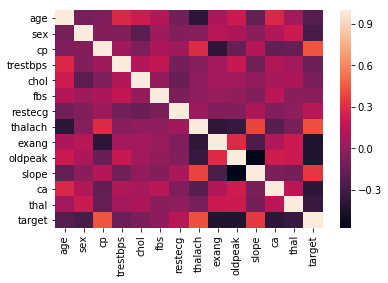

In [14]:
import seaborn as sns
sns.heatmap(corr) # this will give you a basic heat map

## Let's make it look pretty

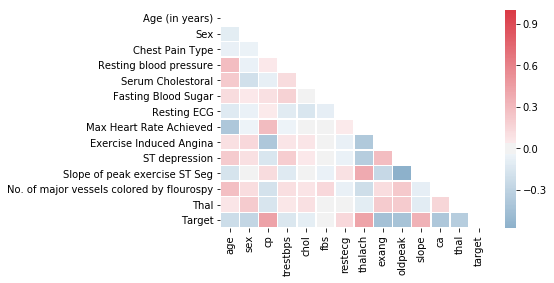

In [22]:
labels = {
    'age': 'Age (in years)', # Can be made categorical,
    'sex': 'Sex', # Categorical
    'cp': 'Chest Pain Type', # Categorical
    'trestbps': 'Resting blood pressure',
    'chol': 'Serum Cholestoral',
    'fbs': 'Fasting Blood Sugar',
    'restecg': 'Resting ECG',
    'thalach': 'Max Heart Rate Achieved',
    'exang': 'Exercise Induced Angina', # Categorical,
    'oldpeak': 'ST depression',
    'slope': 'Slope of peak exercise ST Seg',
    'ca': 'No. of major vessels colored by flourospy', # Range (0-3)
    'thal': 'Thal', # Categorical,
    'target': 'Target'
}

corr = corr.rename(labels)

# This is to remove the top right triange - because that's just duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, linewidths=.5, cmap=cmap, center=0)

## What do we see?
- It seems like Chest Pain, Resting ECG, Thalach and slope have a positive correlation with hear disease
- There too, Chest pain type and thal ach has a higher value of correlation
- Perhaps if we do, PCA on this dataset, we *might* get better accuracy
- Many of the variables have close to zero correlation (possibly we can try to fit our model without them)

## Let's try PCA

In [31]:
from sklearn.decomposition import PCA

component_var = {}
for i in range(2, 6):
    pca = PCA(n_components=i)
    res = pca.fit(df)
#     print('At components: ', i)
#     display(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
    component_var[i] = sum(pca.explained_variance_ratio_)
print(component_var)


{2: 0.8978857904939237, 3: 0.982477175812727, 4: 0.9986920349598674, 5: 0.9990929026876234}


### At 3-4 components, we see almost all the data is captured!
We should definitely try the data fitted with PCA